In [43]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt 
%matplotlib inline
pd.set_option('display.max_columns',500)
import seaborn as sns

In [3]:
path = '..\\data_set\\datos_musica.csv'

In [4]:
df = pd.read_csv(path, encoding='latin-1')

In [5]:
df.head()

,archivo,zero_cr,zero_crossings_m,spectral_centroid,spectral_bw,spectral_rf,croma,mfcc_1,mfcc_2,mfcc_3,...,mfcc_13,mfcc_14,mfcc_15,mfcc_16,mfcc_17,mfcc_18,mfcc_19,mfcc_20,BPM,genero
0,01-TheMountain_02m_00s__03m_00s.mp3,6,0.06,2358.978044,2552.823890,4793.526802,0.470420,-163.372833,165.717529,-50.697205,...,3.154028,3.419914,1.201207,-3.672799,1.497480,0.186496,0.511725,-5.180268,126.048018,prog
1,01ANightmareToRemember_02m_00s__03m_00s.mp3,4,0.04,3100.689109,3256.578868,6469.363992,0.596201,-48.062439,135.743393,-53.932007,...,1.639240,5.244628,1.330808,-2.682353,0.532447,-1.862646,1.804187,-5.636509,126.048018,prog
2,01AcidRain_02m_00s__03m_00s.mp3,5,0.05,3198.378355,3543.702522,6808.570540,0.546079,-58.244419,134.549545,-35.384872,...,-0.928300,4.593798,1.471745,0.739590,0.728077,-4.671610,3.458641,-1.755218,126.048018,prog
3,01BalrogBoogie_02m_00s__03m_00s.mp3,2,0.02,2942.011868,3163.903990,6050.917527,0.433330,-91.082634,134.391296,-46.598930,...,4.266488,2.395693,1.147897,1.289821,-0.101062,-4.962541,3.051191,-2.858684,126.048018,prog
4,01C'estlaVie_02m_00s__03m_00s.mp3,5,0.05,3123.743239,3337.527859,6499.844646,0.535730,-34.448353,137.779984,-48.767544,...,1.035663,3.280222,3.242964,-4.131340,1.912559,-6.067165,2.728408,-6.114751,126.048018,prog


In [6]:
df.shape

(390, 29)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 390 entries, 0 to 389
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   archivo            390 non-null    object 
 1   zero_cr            390 non-null    int64  
 2   zero_crossings_m   390 non-null    float64
 3   spectral_centroid  390 non-null    float64
 4   spectral_bw        390 non-null    float64
 5   spectral_rf        390 non-null    float64
 6   croma              390 non-null    float64
 7   mfcc_1             390 non-null    float64
 8   mfcc_2             390 non-null    float64
 9   mfcc_3             390 non-null    float64
 10  mfcc_4             390 non-null    float64
 11  mfcc_5             390 non-null    float64
 12  mfcc_6             390 non-null    float64
 13  mfcc_7             390 non-null    float64
 14  mfcc_8             390 non-null    float64
 15  mfcc_9             390 non-null    float64
 16  mfcc_10            390 non

In [8]:
df.isnull().any().any()

False

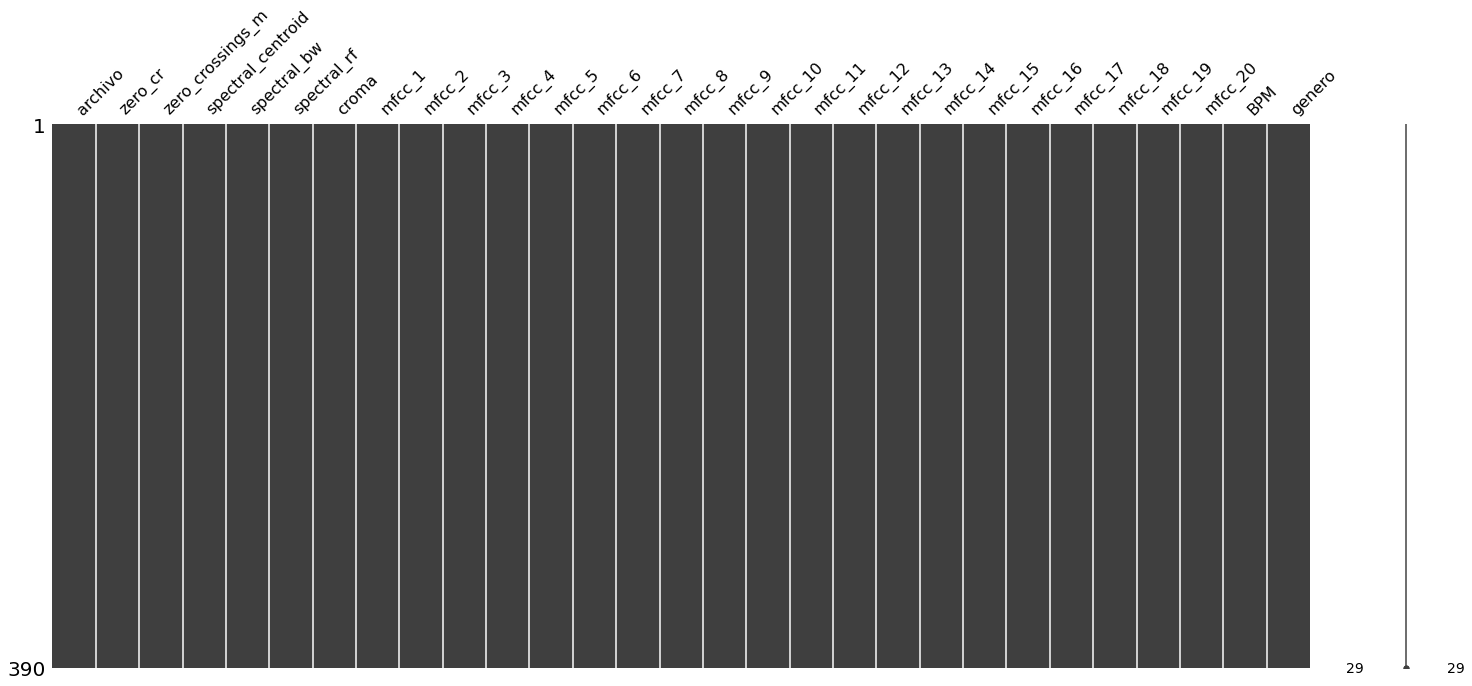

In [9]:
msno.matrix(df)

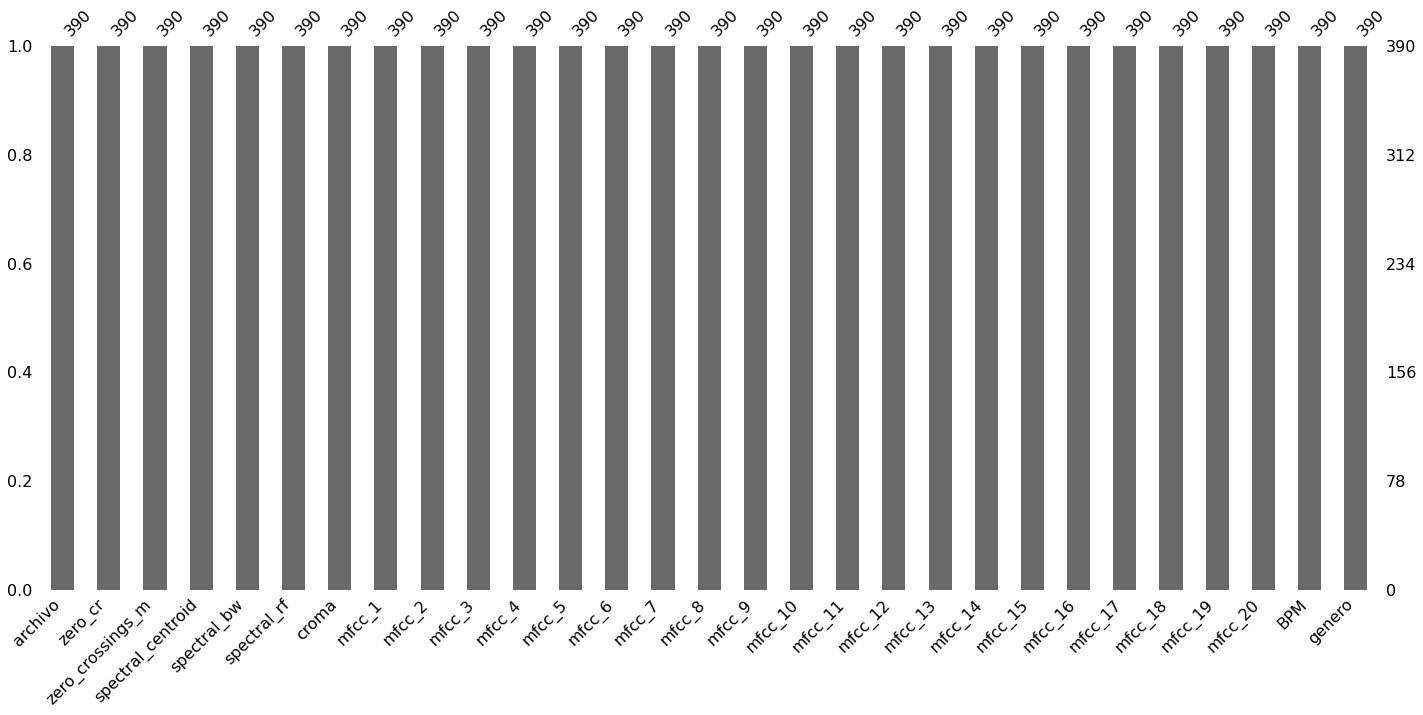

In [10]:
msno.bar(df)

In [20]:
#
df.groupby('genero').mean()

,zero_cr,zero_crossings_m,spectral_centroid,spectral_bw,spectral_rf,croma,mfcc_1,mfcc_2,mfcc_3,mfcc_4,...,mfcc_12,mfcc_13,mfcc_14,mfcc_15,mfcc_16,mfcc_17,mfcc_18,mfcc_19,mfcc_20,BPM
genero,,,,,,,,,,,,,,,,,,,,,
electronica,7.715385,0.077154,3664.769823,3719.675979,7857.998810,0.532508,-65.689816,116.190062,-37.717804,45.229312,...,6.901863,2.001522,2.897985,3.759977,-0.840888,4.367829,-2.061035,5.707278,-2.616686,126.219512
prog,4.892308,0.048923,2633.703679,2944.731812,5422.004875,0.520611,-121.510305,147.896507,-41.057114,46.850062,...,4.925011,1.455034,1.789769,1.790361,-1.988850,-0.077769,-2.959955,1.395956,-4.444564,126.048018
salsa,7.492308,0.074923,2866.901424,3039.036636,5855.439288,0.419100,-204.440593,140.781212,-40.942452,49.471140,...,3.850634,-0.208070,-2.329010,2.166250,-3.473790,0.526125,-3.216435,1.328346,-5.358968,126.048018


In [18]:
df.groupby('genero').sum()

,zero_cr,zero_crossings_m,spectral_centroid,spectral_bw,spectral_rf,croma,mfcc_1,mfcc_2,mfcc_3,mfcc_4,...,mfcc_12,mfcc_13,mfcc_14,mfcc_15,mfcc_16,mfcc_17,mfcc_18,mfcc_19,mfcc_20,BPM
genero,,,,,,,,,,,,,,,,,,,,,
electronica,1003,10.03,476420.077002,483557.877316,1.021540e+06,69.226015,-8539.676029,15104.708008,-4903.314475,5879.810562,...,897.242153,260.197850,376.738034,488.797064,-109.315454,567.817754,-267.934497,741.946143,-340.169169,16408.536585
prog,636,6.36,342381.478319,382815.135509,7.048606e+05,67.679463,-15796.339670,19226.545853,-5337.424873,6090.508018,...,640.251488,189.154370,232.669944,232.746934,-258.550532,-10.109989,-384.794204,181.474286,-577.793285,16386.242378
salsa,974,9.74,372697.185132,395074.762703,7.612071e+05,54.482959,-26577.277153,18301.557556,-5322.518778,6431.248230,...,500.582481,-27.049123,-302.771240,281.612480,-451.592696,68.396310,-418.136518,172.684979,-696.665796,16386.242378


In [26]:
df_cr = (df.groupby('zero_cr').mean())

In [29]:
df_cr.head()

,zero_crossings_m,spectral_centroid,spectral_bw,spectral_rf,croma,mfcc_1,mfcc_2,mfcc_3,mfcc_4,mfcc_5,...,mfcc_12,mfcc_13,mfcc_14,mfcc_15,mfcc_16,mfcc_17,mfcc_18,mfcc_19,mfcc_20,BPM
zero_cr,,,,,,,,,,,,,,,,,,,,,
0,0.00,3118.129126,3351.730417,6590.445298,0.549077,-121.199815,125.907322,-34.244926,47.922388,-10.435057,...,5.731326,2.420729,2.050329,3.891343,-0.840685,3.375337,-1.488652,4.344491,-3.010951,126.295732
1,0.01,2671.226273,2980.085113,5580.229172,0.489802,-150.772081,146.718790,-38.086393,44.042454,-5.501369,...,3.606840,1.848554,0.019824,1.575127,-2.591403,-0.296262,-3.407721,1.465439,-3.978728,126.048018
2,0.02,2458.619619,2840.928209,5055.766178,0.468470,-157.467401,155.367670,-34.269661,40.743628,-3.991758,...,3.669403,0.497253,-0.409696,0.785100,-2.870769,-1.073980,-3.373061,0.937194,-4.582756,126.048018
3,0.03,2845.784610,3071.237940,5922.593410,0.488853,-132.358523,140.820661,-42.432253,47.473422,-4.732514,...,5.249850,1.729798,0.449644,2.495410,-2.578824,0.947610,-2.961876,1.261960,-4.580596,126.048018
4,0.04,2938.872147,3173.422484,6158.554662,0.467441,-146.443491,139.029684,-39.581771,44.119310,-10.605872,...,5.281437,1.025857,1.638082,2.477301,-1.373081,0.773471,-2.605585,1.646329,-3.989339,126.048018


In [35]:
df_pg = df.groupby('genero').mean()
df_pg.head()

,zero_cr,zero_crossings_m,spectral_centroid,spectral_bw,spectral_rf,croma,mfcc_1,mfcc_2,mfcc_3,mfcc_4,...,mfcc_12,mfcc_13,mfcc_14,mfcc_15,mfcc_16,mfcc_17,mfcc_18,mfcc_19,mfcc_20,BPM
genero,,,,,,,,,,,,,,,,,,,,,
electronica,7.715385,0.077154,3664.769823,3719.675979,7857.998810,0.532508,-65.689816,116.190062,-37.717804,45.229312,...,6.901863,2.001522,2.897985,3.759977,-0.840888,4.367829,-2.061035,5.707278,-2.616686,126.219512
prog,4.892308,0.048923,2633.703679,2944.731812,5422.004875,0.520611,-121.510305,147.896507,-41.057114,46.850062,...,4.925011,1.455034,1.789769,1.790361,-1.988850,-0.077769,-2.959955,1.395956,-4.444564,126.048018
salsa,7.492308,0.074923,2866.901424,3039.036636,5855.439288,0.419100,-204.440593,140.781212,-40.942452,49.471140,...,3.850634,-0.208070,-2.329010,2.166250,-3.473790,0.526125,-3.216435,1.328346,-5.358968,126.048018


In [36]:
df_prog = df[df['genero'] == 'prog']
df_salsa = df[df['genero'] == 'salsa']
df_electro = df[df['genero'] == 'electronica']

In [42]:
df_prog.describe()

,zero_cr,zero_crossings_m,spectral_centroid,spectral_bw,spectral_rf,croma,mfcc_1,mfcc_2,mfcc_3,mfcc_4,mfcc_5,mfcc_6,mfcc_7,mfcc_8,mfcc_9,mfcc_10,mfcc_11,mfcc_12,mfcc_13,mfcc_14,mfcc_15,mfcc_16,mfcc_17,mfcc_18,mfcc_19,mfcc_20,BPM
count,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,1.300000e+02
mean,4.892308,0.048923,2633.703679,2944.731812,5422.004875,0.520611,-121.510305,147.896507,-41.057114,46.850062,0.305706,26.756867,-6.182665,15.559259,-1.505437,9.135088,0.658689,4.925011,1.455034,1.789769,1.790361,-1.988850,-0.077769,-2.959955,1.395956,-4.444564,1.260480e+02
std,4.169372,0.041694,658.814736,515.524886,1473.567007,0.077373,71.450081,20.585623,18.881070,14.463708,14.539255,9.493102,7.498076,7.067624,4.966736,6.189063,3.522030,3.661047,3.232949,3.046489,2.940535,2.358867,2.941259,2.383593,2.645244,1.793934,4.279749e-14
min,0.000000,0.000000,1048.112296,1714.480370,1996.470645,0.316121,-344.386047,103.329323,-82.701820,3.453289,-22.417343,-4.785975,-25.599236,-1.163200,-18.384262,-9.264774,-9.657818,-6.518651,-9.116914,-6.113125,-7.433909,-9.079109,-7.828662,-8.972962,-7.153063,-9.232677,1.260480e+02
25%,2.000000,0.020000,2225.141264,2662.427306,4504.723752,0.463181,-173.016273,134.512318,-51.879293,40.209305,-10.605130,21.654290,-12.095486,10.842977,-4.819321,5.081626,-1.605195,2.224272,-0.446193,-0.221711,0.359512,-3.661104,-1.999560,-4.255807,-0.333184,-5.715235,1.260480e+02
50%,4.000000,0.040000,2683.065914,3023.110754,5594.874809,0.521571,-112.134422,143.102348,-46.080870,49.513689,-3.130756,29.233766,-7.102464,16.993861,-1.815856,10.295965,0.421407,5.314972,1.657556,2.408129,2.152026,-1.720426,-0.108174,-2.938440,1.797817,-4.536909,1.260480e+02
75%,7.000000,0.070000,3139.723828,3337.161536,6614.362419,0.575490,-54.669636,161.439980,-33.425914,57.169891,10.448890,33.446754,-1.266778,20.940663,1.779710,13.961430,2.439199,7.734683,3.442543,3.976297,4.178379,-0.361794,1.977157,-1.278665,3.445596,-3.131136,1.260480e+02
max,21.000000,0.210000,4142.615401,4071.635709,9046.439683,0.720746,-21.838949,212.757401,25.490688,71.573174,42.368832,46.206753,13.943148,28.516800,10.746690,20.108494,10.272728,10.796695,8.915794,9.527276,7.571540,2.907376,7.072568,4.452285,6.486546,0.851423,1.260480e+02


In [38]:
df_salsa.describe()

,zero_cr,zero_crossings_m,spectral_centroid,spectral_bw,spectral_rf,croma,mfcc_1,mfcc_2,mfcc_3,mfcc_4,...,mfcc_12,mfcc_13,mfcc_14,mfcc_15,mfcc_16,mfcc_17,mfcc_18,mfcc_19,mfcc_20,BPM
count,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,...,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,1.300000e+02
mean,7.492308,0.074923,2866.901424,3039.036636,5855.439288,0.419100,-204.440593,140.781212,-40.942452,49.471140,...,3.850634,-0.208070,-2.329010,2.166250,-3.473790,0.526125,-3.216435,1.328346,-5.358968,1.260480e+02
std,6.306446,0.063064,586.447208,420.964258,1232.804563,0.044419,42.222284,19.102457,15.447486,13.173786,...,4.418852,3.911852,3.439732,3.226543,3.105868,3.150945,3.128406,2.908442,3.146417,4.279749e-14
min,0.000000,0.000000,1459.244996,1812.507158,2802.551814,0.326563,-285.890106,96.706963,-80.105560,15.379141,...,-8.356874,-11.080114,-10.705889,-9.183908,-10.831484,-12.717571,-10.186462,-6.103932,-11.849880,1.260480e+02
25%,4.000000,0.040000,2503.788992,2812.543322,5090.260062,0.388197,-228.184120,128.197430,-51.756855,40.917833,...,1.165190,-3.014426,-4.049812,0.378729,-5.766983,-1.340400,-4.976571,-0.591820,-7.293654,1.260480e+02
50%,6.500000,0.065000,2876.611750,3081.100122,5911.505462,0.415375,-210.118080,138.410698,-40.427128,49.634489,...,3.707825,-0.393766,-2.325369,2.283137,-3.535007,0.583193,-3.332157,1.276090,-5.456972,1.260480e+02
75%,10.000000,0.100000,3235.193725,3275.693270,6702.715104,0.453852,-187.237431,151.481182,-29.783157,58.298253,...,6.379815,1.960927,-0.588893,4.079607,-1.230113,2.402179,-1.418864,3.147765,-3.246953,1.260480e+02
max,38.000000,0.380000,4402.567199,4021.630013,8956.178601,0.566167,-64.380310,191.915710,6.872907,80.919510,...,16.035908,10.967260,6.438748,13.283858,5.066945,7.168848,5.869052,8.356276,4.313604,1.260480e+02


In [40]:
df_electro.describe()

,zero_cr,zero_crossings_m,spectral_centroid,spectral_bw,spectral_rf,croma,mfcc_1,mfcc_2,mfcc_3,mfcc_4,...,mfcc_12,mfcc_13,mfcc_14,mfcc_15,mfcc_16,mfcc_17,mfcc_18,mfcc_19,mfcc_20,BPM
count,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,...,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000
mean,7.715385,0.077154,3664.769823,3719.675979,7857.998810,0.532508,-65.689816,116.190062,-37.717804,45.229312,...,6.901863,2.001522,2.897985,3.759977,-0.840888,4.367829,-2.061035,5.707278,-2.616686,126.219512
std,6.694015,0.066940,608.539797,441.346374,1297.170082,0.070853,44.347776,15.083885,11.228578,8.482291,...,4.339634,3.973029,4.143186,3.010934,3.643425,3.285281,3.443401,3.564014,3.180796,1.377259
min,0.000000,0.000000,2049.841668,2454.367352,4418.034665,0.293667,-221.812943,79.576607,-71.001747,18.148603,...,-8.350393,-8.601421,-8.937236,-5.459874,-8.734571,-7.524639,-9.906082,-8.786132,-9.449674,126.048018
25%,2.000000,0.020000,3272.323508,3448.385020,7047.946173,0.486911,-93.537563,106.754791,-46.002082,39.199781,...,4.321048,-0.617854,0.616511,1.950362,-2.971701,2.892734,-4.230994,3.807357,-4.934881,126.048018
50%,7.000000,0.070000,3610.700985,3702.842472,7844.588883,0.543285,-59.286905,114.221664,-38.175827,46.260447,...,6.521986,1.421102,2.433439,3.964610,-0.903565,5.046066,-2.553039,6.197090,-2.865976,126.048018
75%,11.000000,0.110000,4044.115739,4042.440196,8702.325750,0.576122,-34.121083,126.272331,-29.233250,50.866775,...,9.428764,3.848216,4.935068,5.874848,1.179869,6.476137,0.077606,8.288830,-0.647206,126.048018
max,27.000000,0.270000,5432.264188,4705.437737,10776.945332,0.707368,11.648904,164.708298,-8.451767,63.748814,...,19.026594,13.946415,20.156885,10.045454,9.132618,11.862654,7.678297,12.606647,7.841331,137.195122


In [73]:
nombres = df.columns
nombres = list(nombres)
nombres

['archivo',
 'zero_cr',
 'zero_crossings_m',
 'spectral_centroid',
 'spectral_bw',
 'spectral_rf',
 'croma',
 'mfcc_1',
 'mfcc_2',
 'mfcc_3',
 'mfcc_4',
 'mfcc_5',
 'mfcc_6',
 'mfcc_7',
 'mfcc_8',
 'mfcc_9',
 'mfcc_10',
 'mfcc_11',
 'mfcc_12',
 'mfcc_13',
 'mfcc_14',
 'mfcc_15',
 'mfcc_16',
 'mfcc_17',
 'mfcc_18',
 'mfcc_19',
 'mfcc_20',
 'BPM',
 'genero']

In [74]:
nombres.pop(nombres.index('archivo'))
nombres.pop(nombres.index('genero'))
nombres

['zero_cr',
 'zero_crossings_m',
 'spectral_centroid',
 'spectral_bw',
 'spectral_rf',
 'croma',
 'mfcc_1',
 'mfcc_2',
 'mfcc_3',
 'mfcc_4',
 'mfcc_5',
 'mfcc_6',
 'mfcc_7',
 'mfcc_8',
 'mfcc_9',
 'mfcc_10',
 'mfcc_11',
 'mfcc_12',
 'mfcc_13',
 'mfcc_14',
 'mfcc_15',
 'mfcc_16',
 'mfcc_17',
 'mfcc_18',
 'mfcc_19',
 'mfcc_20',
 'BPM']

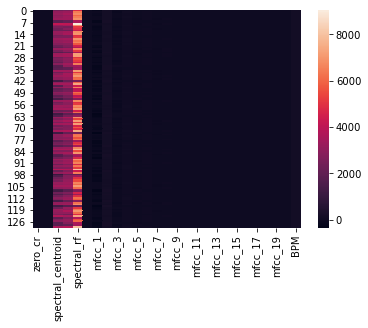

In [75]:
sns.heatmap(df_prog[nombres])

KeyError: 'zer_cr'

In [12]:
### Entrenamiento 

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
x=df.iloc[:390,[0]].values

In [15]:
y = df.iloc[:,[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27]].values

In [16]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [69]:
a = ['1', '2', '3', '4', '5', '6']

In [67]:
a.pop(a.index('1'))
a.pop(a.index('5'))
a.pop(a.index('3'))

'3'

In [68]:
a

['2', '4', '6']